# PanAntarctic MOM6 Simulations
This notebook documents some output from preliminary simulations using MOM6 with open boundaries to create a 1/20° Southern Ocean simulation.

In [1]:
%matplotlib inline
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt

## Update Database
Make a local database for this simulation and update.

In [2]:
db='panant.db'
session=cc.database.create_session(db)

In [10]:
dir_list = '/scratch/x77/ahg157/mom6/archive/panan'
cc.database.build_index(dir_list,session,update=True)

0it [00:00, ?it/s]

Indexing experiment: panan


0

## Have a look at outputs
Use this explorer tool to see what outputs are available

In [4]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## Basic sanity checks
These timeseries show the length of the run and some key quantities to confirm that Heat, Mass, Salt, Energy are sensible.

In [5]:
darray = cc.querying.getvar('panan','temp',session)
darray

<xarray.DataArray 'temp' (time: 59, zl: 75, yh: 1690, xh: 7200)>
dask.array<concatenate, shape=(59, 75, 1690, 7200), dtype=float32, chunksize=(6, 75, 1690, 7200), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -81.1 -81.08 -81.06 -81.03 ... -37.16 -37.12 -37.08
  * zl       (zl) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.805e+03
  * time     (time) object 1992-01-03 12:00:00 ... 1992-10-28 12:00:00
  * xh       (xh) float64 -280.0 -279.9 -279.9 -279.8 ... 79.87 79.92 79.97
Attributes:
    units:          degC
    long_name:      Potential Temperature
    cell_methods:   area:mean zl:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT

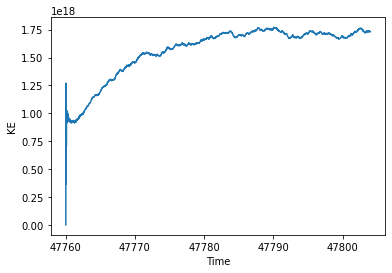

In [6]:
darray = cc.querying.getvar('panan','KE', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.sum('Layer').plot()

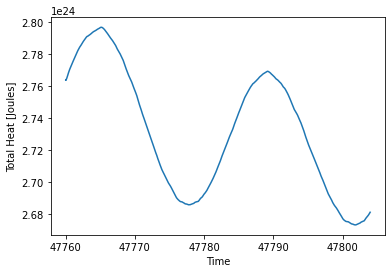

In [7]:
darray = cc.querying.getvar('panan','Heat', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()

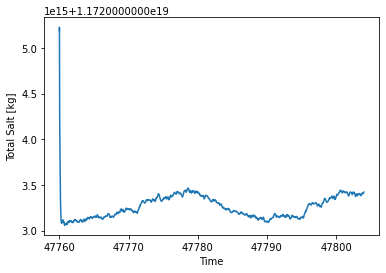

In [8]:
darray = cc.querying.getvar('panan','Salt', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()

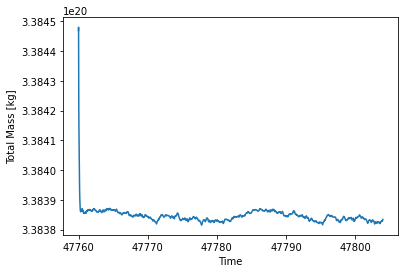

In [9]:
darray = cc.querying.getvar('panan','Mass', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()